# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [49]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [50]:
from datetime import datetime


df_1950 = df[df.dt >= datetime(1950, 1, 1)]
df_1950.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

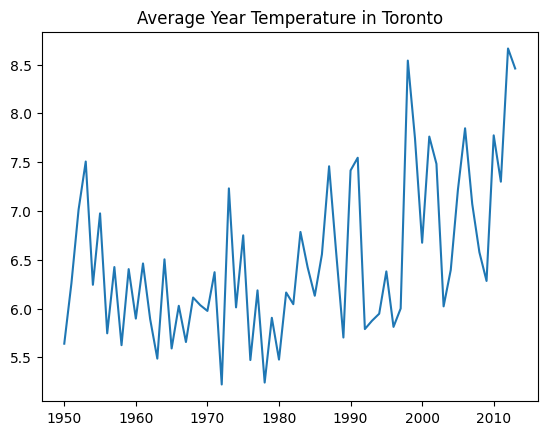

In [51]:
df_toronto = df_1950[df_1950.City == "Toronto"]
plt.plot(df_toronto.groupby(df_toronto.dt.dt.year).AverageTemperature.mean())
plt.title("Average Year Temperature in Toronto")
plt.show()


# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [52]:
df_1950.groupby(df_1950.City).AverageTemperature.var().idxmax()


'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

/var/folders/39/4xn4_yy17mvf46wy12z_btvr0000gn/T/ipykernel_38158/419028874.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1950["LongitudeF"] = df_1950.Longitude.map(convert_longitude)
/var/folders/39/4xn4_yy17mvf46wy12z_btvr0000gn/T/ipykernel_38158/419028874.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1950["LatitudeF"] = df_1950.Latitude.map(convert_latitude)


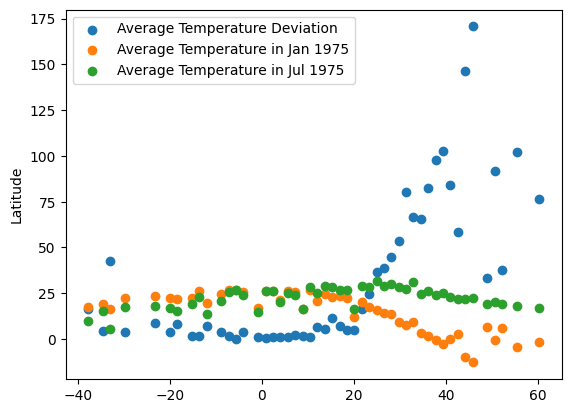

In [53]:
def convert_longitude(value: str) -> float:
    """Convert longitude in format '<number>E/W' to positive or negative float.

    If longitude is East multiple by 1, if West then multiply by -1.
    """
    return -float(value[:-1]) if value[-1] == "W" else float(value[:-1])


def convert_latitude(value: str) -> float:
    """Convert latitude in format '<number>N/S' to positive or negative float.

    If longitude is North multiple by 1, if South then multiply by -1.
    """
    return -float(value[:-1]) if value[-1] == "S" else float(value[:-1])


df_1950["LongitudeF"] = df_1950.Longitude.map(convert_longitude)
df_1950["LatitudeF"] = df_1950.Latitude.map(convert_latitude)

latitude_vs_average_temperature = df_1950.groupby(
    df_1950.LatitudeF
).AverageTemperature.var()

latitude_vs_average_temperature_jan_1975 = (
    df_1950[(df_1950.dt.dt.year == 1975) & (df_1950.dt.dt.month == 1)]
    .groupby(df_1950.LatitudeF)
    .AverageTemperature.mean()
)

latitude_vs_average_temperature_jul_1975 = (
    df_1950[(df_1950.dt.dt.year == 1975) & (df_1950.dt.dt.month == 7)]
    .groupby(df_1950.LatitudeF)
    .AverageTemperature.mean()
)
f = plt.figure()
plt.scatter(
    x=latitude_vs_average_temperature.index,
    y=latitude_vs_average_temperature.values,
    label="Average Temperature Deviation",
)
plt.scatter(
    x=latitude_vs_average_temperature_jan_1975.index,
    y=latitude_vs_average_temperature_jan_1975.values,
    label="Average Temperature in Jan 1975",
)
plt.scatter(
    x=latitude_vs_average_temperature_jul_1975.index,
    y=latitude_vs_average_temperature_jul_1975.values,
    label="Average Temperature in Jul 1975",
)

plt.ylabel("Latitude")
plt.legend()
plt.show()


# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

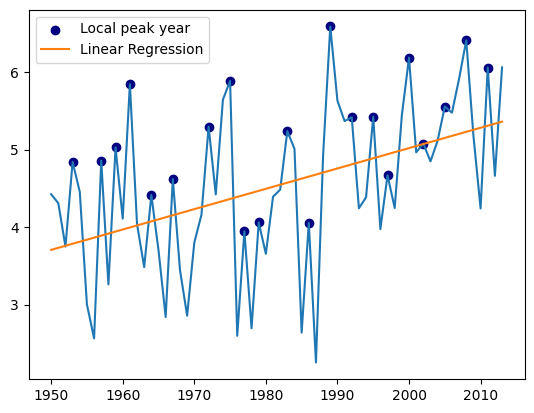

In [54]:
from sklearn.linear_model import LinearRegression
import numpy as np

df_spb = (
    df_1950[df_1950.City == "Saint Petersburg"]
    .groupby(df_1950.dt.dt.year)
    .AverageTemperature.mean()
)
years = df_spb[(df_spb > df_spb.shift(1)) & (df_spb > df_spb.shift(-1))]

train = np.array(df_spb.index).reshape(-1, 1)

reg = LinearRegression()
reg.fit(train, df_spb.values)

plt.scatter(years.index, years.values, color="navy", label="Local peak year")
plt.plot(df_spb.index, df_spb.values)
plt.plot(df_spb.index, reg.predict(train), label="Linear Regression")
plt.legend()
plt.show()


# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [55]:
gp_city = df_1950.groupby(df_1950.City)

diff = gp_city.AverageTemperature.max().subtract(gp_city.AverageTemperature.min())
print(f"City with max diff: {diff.idxmax()}")
diff.sort_values(ascending=False)


City with max diff: Harbin


City
Harbin              49.279
Changchun           46.542
Moscow              43.523
Shenyang            41.216
Saint Petersburg    40.510
                     ...  
Lagos                4.058
Cali                 4.008
Bogotá               3.744
Singapore            3.665
Jakarta              3.363
Name: AverageTemperature, Length: 100, dtype: float64

In [56]:
# highest diff between mean jan and mean jul temperature

gp_jan = (
    df_1950[df_1950.dt.dt.month == 1].groupby(df_1950.City).AverageTemperature.mean()
)
gp_jul = (
    df_1950[df_1950.dt.dt.month == 7].groupby(df_1950.City).AverageTemperature.mean()
)

diff = (gp_jan.subtract(gp_jul)).abs()

print(f"City with max diff between mean Jan and Jul temperature: {diff.idxmax()}")
diff.sort_values(ascending=False)


City with max diff between mean Jan and Jul temperature: Harbin


City
Harbin       41.992719
Changchun    39.603719
Shenyang     34.927016
Montreal     31.169109
Tianjin      30.658703
               ...    
Lagos         0.317484
Jakarta       0.289859
Surabaya      0.238172
Bogotá        0.200234
Cali          0.161625
Name: AverageTemperature, Length: 100, dtype: float64

In [57]:
# city with max mean amount of months per year with negative temperature
# we assume that on average month has 30 days
gp_mean_month = df_1950[df_1950.AverageTemperature < 0.0].groupby(
    [df_1950.City, df_1950.dt.dt.year]
).AverageTemperature.count().agg(lambda x: x / 30).reset_index().groupby(
    "City"
).AverageTemperature.mean()
print(f"City with max mean amount of months per year with negative temp: {gp_mean_month.idxmax()}")
gp_mean_month.sort_values(ascending=False)

City with max mean amount of months per year with negative temp: Harbin


City
Harbin              0.163542
Changchun           0.161458
Moscow              0.151562
Montreal            0.142187
Saint Petersburg    0.137500
Toronto             0.130729
Shenyang            0.125000
Kiev                0.111979
Taiyuan             0.107813
Dalian              0.091667
Peking              0.086979
Tianjin             0.086979
Seoul               0.077957
Tangshan            0.076563
New York            0.075956
Xian                0.061828
Chicago             0.056463
Santiago            0.053216
Ankara              0.052713
Mashhad             0.050667
Jinan               0.048889
Berlin              0.048062
London              0.040000
Tokyo               0.040000
Paris               0.038889
Rome                0.033333
Madrid              0.033333
Kabul               0.033333
Chengdu             0.033333
Nanjing             0.033333
Name: AverageTemperature, dtype: float64

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

In [58]:
df_10 = df_1950[df_1950.dt.dt.year >= (df_1950.dt.dt.year.max() - 10)]
df_10.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,LongitudeF,LatitudeF
1848,2003-01-01,27.590,0.477,Abidjan,Côte D'Ivoire,5.63N,3.23W,-3.23,5.63
1849,2003-02-01,28.863,0.379,Abidjan,Côte D'Ivoire,5.63N,3.23W,-3.23,5.63
1850,2003-03-01,28.980,0.383,Abidjan,Côte D'Ivoire,5.63N,3.23W,-3.23,5.63
1851,2003-04-01,28.169,0.282,Abidjan,Côte D'Ivoire,5.63N,3.23W,-3.23,5.63
1852,2003-05-01,27.910,0.247,Abidjan,Côte D'Ivoire,5.63N,3.23W,-3.23,5.63


In [59]:
df_city_jan = df_10[df_10.dt.dt.month == 1].groupby(df_10.City)
df_raw = pd.DataFrame(
    {
        "t": df_city_jan.AverageTemperature.mean().values,
        "lat": df_city_jan.LatitudeF.max().values,
        "lon": df_city_jan.LongitudeF.max().values,
    },
    index=df_10.City.unique(),
).sort_values("t", ascending=False)
df_raw['City'] = df_raw.index
df_raw = df_raw.reset_index().drop("index", axis=1)
df_raw.head()


,t,lat,lon,City
0,28.436000,-7.23,39.73,Dar Es Salaam
1,28.013727,-4.02,-40.98,Fortaleza
2,27.806818,7.23,4.05,Ibadan
3,27.331455,2.41,45.80,Mogadishu
4,27.310909,5.63,-3.23,Abidjan


In [60]:
import folium
import geopandas
import colour

heat = list(colour.Color("red").range_to(colour.Color("blue"), len(df_raw.index)))

geometry = geopandas.points_from_xy(df_raw.lon, df_raw.lat)
df_geo = geopandas.GeoDataFrame(df_raw, geometry=geometry)
f_map = folium.Map(zoom_start=10)
df_geo.apply(
    lambda row: folium.Marker(
        location=[row.lat, row.lon],
        icon=folium.Icon(
            color="black",
            icon_color=heat[row.name].hex,
        ),
        popup=row.City
    ).add_to(f_map),
    axis=1,
)

f_map


*[Ссылка на проект](https://github.com/katunilya/python-2022-3.8-project)*

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

Найдите город, в котором максимальная температура декабря  с 1960 по 1980 годы
была максимальной среди всех городов расположенных южнее 50 градусов северной
широты и севернее 30 градусов северной широты. 

In [61]:
x = df_1950[
    (df_1950.dt.dt.year >= 1960)
    & (df_1950.dt.dt.year <= 1980)
    & (df_1950.LatitudeF <= 50.0)
    & (df_1950.LatitudeF >= 30.0)
    & (df_1950.dt.dt.month == 12)
].groupby(df_1950.City).AverageTemperature.max()
print(x.idxmax())
x.sort_values(ascending=False)

Alexandria


City
Alexandria     18.794
Izmir          15.217
Lahore         14.751
Faisalabad     14.751
Baghdad        13.380
Casablanca     12.755
Los Angeles    11.841
Istanbul       11.471
Aleppo          9.709
Shanghai        9.375
Nagoya          8.868
Nanjing         8.151
Paris           7.378
Madrid          6.545
Tokyo           6.501
Rome            5.808
Kabul           5.635
Chicago         5.494
Mashhad         5.492
Ankara          4.254
Chengdu         3.457
Jinan           3.295
Seoul           2.456
New York        1.794
Xian            1.444
Tangshan        0.653
Dalian          0.574
Tianjin        -0.096
Peking         -0.096
Toronto        -2.062
Taiyuan        -3.655
Montreal       -4.903
Shenyang       -5.166
Changchun      -9.535
Harbin        -12.433
Name: AverageTemperature, dtype: float64

Широта - это условно "Y", долгота - очень условно "X". Разделите весь диапазон
широт на зоны по 20 градусов. Для каждой зоны постройте график зависимости
среднегодовой температуры от долготы, на одной оси

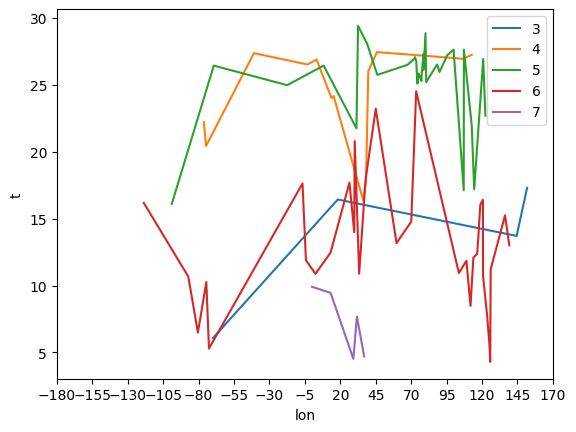

In [100]:
from cProfile import label
import toolz

def latitude_group(r):
    match r:
        case x if x >= -90 and x < -70:
            return 1
        case x if x >= -70 and x < -50:
            return 2
        case x if x >= -50 and x < -30:
            return 3
        case x if x >= -10 and x < 10:
            return 4
        case x if x >= 10 and x < 30:
            return 5
        case x if x >= 30 and x < 50:
            return 6
        case x if x >= 50 and x < 70:
            return 7
        case x if x >= 70:
            return 8

df_1950 = df_1950.dropna()
df_1950['group'] = df_1950.LatitudeF.apply(latitude_group)

gp = df_1950.groupby([df_1950.group])
ss = [gp.get_group(group) for group in gp.groups]

for s in ss:
    d = s.groupby(s.LongitudeF).AverageTemperature.mean()
    plt.plot(d.index, d.values, label=s.group.iloc[0])
plt.ylabel("t")
plt.xlabel("lon")
plt.xticks(list(range(-180, 181, 25)))
plt.legend()
plt.show()